<a href="https://colab.research.google.com/github/darshanvjani/ERA_vision_nlp_ai/blob/main/Batch%20Normalization%20and%20Regularization/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/ERA/Batch Normalization

/content/drive/MyDrive/ERA/Batch Normalization


In [2]:
%matplotlib inline

In [3]:
!pip install albumentations==1.0.0
import albumentations as A

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [4]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensorV2
import numpy as np
import torchvision.datasets as datasets
import torchvision.utils as utils

from model import Net
from utils import *
from train import *

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [6]:
# mean, std = get_mean_std(trainloader)

# print(mean, std)

In [7]:
horizontalflip_prob = 0.2
rotate_limit = 15
shiftscalerotate_prob = 0.25
num_holes = 1
cutout_prob = 0.5

train_transforms, test_transforms = data_albumentations(horizontalflip_prob, rotate_limit, shiftscalerotate_prob, num_holes, cutout_prob, trainloader)

In [8]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = train_transforms)

test_set  = datasets.CIFAR10(root='./data', train=False,
                                download=True, transform=test_transforms)


train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2,
                                          pin_memory=True)

test_loader = torch.utils.data.DataLoader(test_set,
                                            batch_size=64,
                                            shuffle=False,
                                            num_workers=2,
                                            pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# mean, std = get_mean_std(train_loader)

# print(mean, std)

##PLOT IMAGE

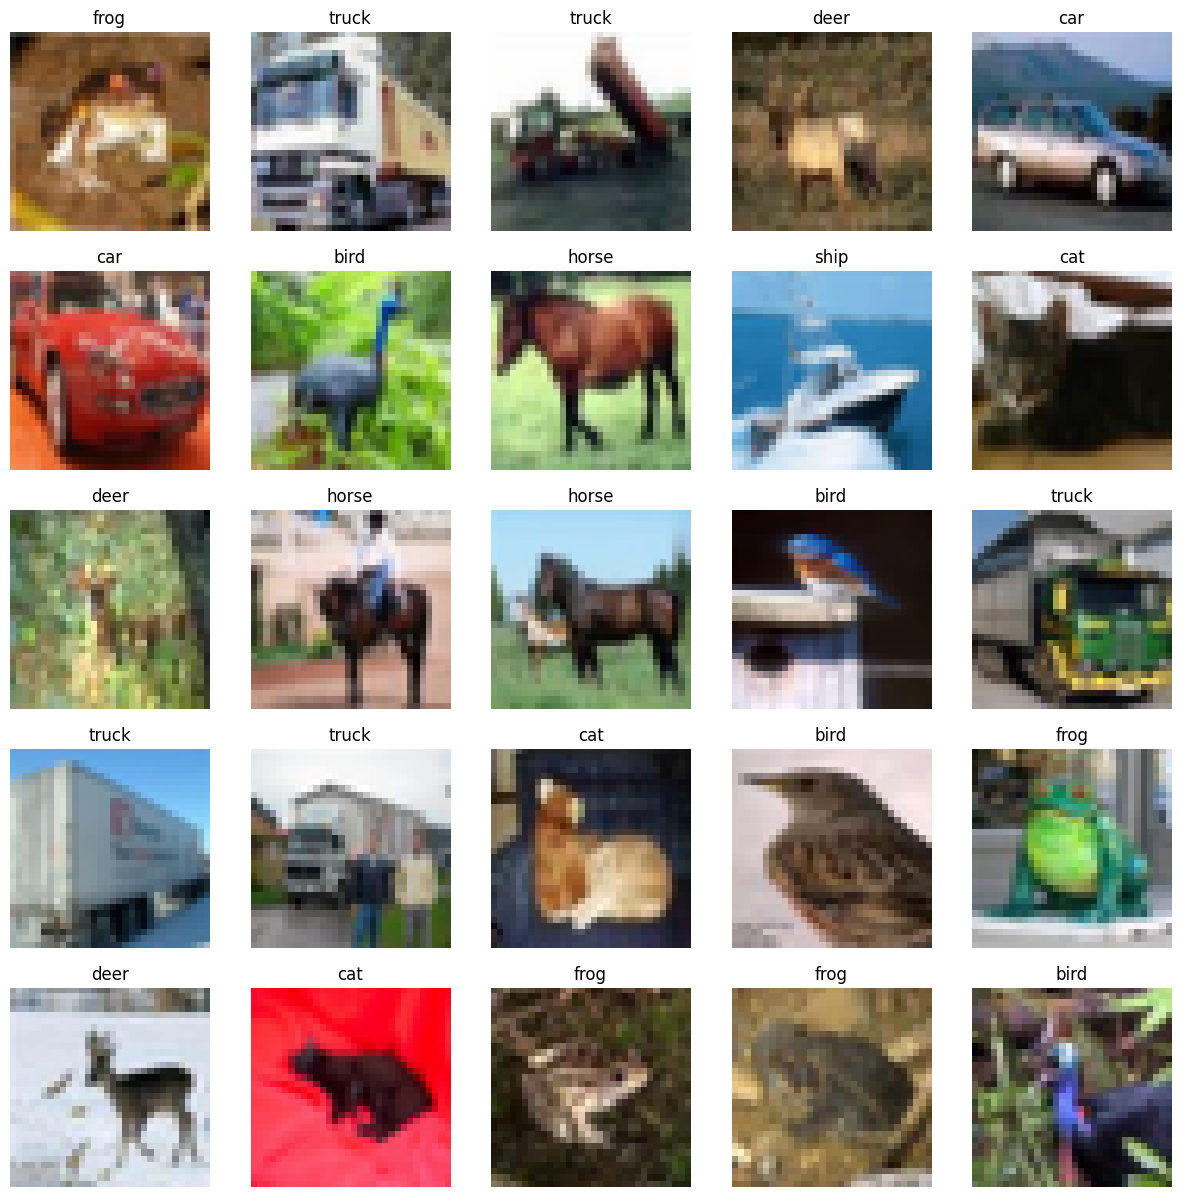

In [10]:
N_IMAGES = 25

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

images, labels = zip(*[(image, label) for image, label in [trainset[i] for i in range(N_IMAGES)]])

plot_images(images, labels, classes)

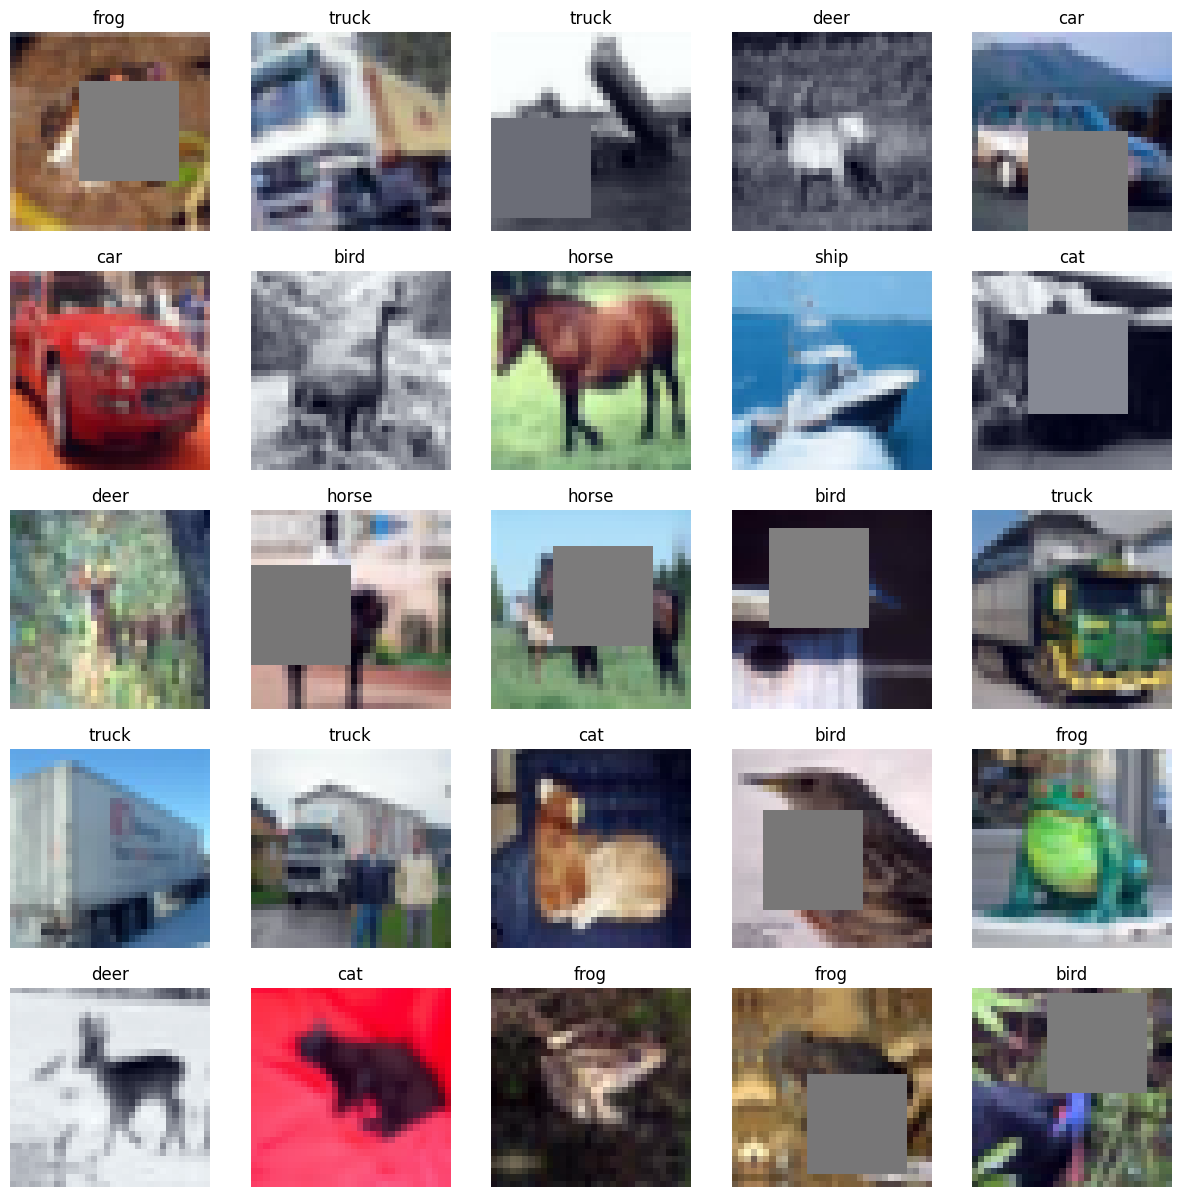

In [11]:
images, labels = zip(*[(image, label) for image, label in [train_set[i] for i in range(N_IMAGES)]])

plot_images(images, labels, classes)

In [12]:
net_bn = Net("BN")
net_gn = Net("GN")
net_ln = Net("LN")

In [13]:
# net = Net()

In [14]:
from torchsummary import summary
summary(net_bn.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
             ReLU-10           [-1, 10, 32, 32]               0
        MaxPool2d-11           [-1, 10, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           2,880
             ReLU-13           [-1, 32, 16, 16]               0
      BatchNorm2d-14           [-1, 32,

In [15]:
summary(net_gn.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
             ReLU-10           [-1, 10, 32, 32]               0
        MaxPool2d-11           [-1, 10, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           2,880
             ReLU-13           [-1, 32, 16, 16]               0
        GroupNorm-14           [-1, 32,

In [16]:
summary(net_ln.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         LayerNorm-3           [-1, 16, 32, 32]          32,768
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         LayerNorm-7           [-1, 16, 32, 32]          32,768
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
             ReLU-10           [-1, 10, 32, 32]               0
        MaxPool2d-11           [-1, 10, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           2,880
             ReLU-13           [-1, 32, 16, 16]               0
        LayerNorm-14           [-1, 32,

##Training

### Log Charts

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]


train_loss_dict = dict()
test_loss_dict = dict()

train_accuracy_dict = dict()
test_accuracy_dict = dict()

test_accuracy_log = []
train_accuracy_log = []

test_loss_log = []
train_loss_log = []

def training_curves():
  plt.subplot(1,2, 1)

  plt.plot(np.array(test_accuracy_log))
  plt.plot(np.array(train_accuracy_log), 'r')
  plt.legend(["test_acc", "train_acc"])
  plt.title("Accuracy per epoch")

  plt.subplot(1,2,2)
  plt.plot(test_loss_log)
  plt.plot(train_loss_log, 'r')
  plt.legend(["test_loss", "train_loss"])
  plt.title("Loss per epoch")



###BN

In [18]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR, OneCycleLR

l1_factor = 0
l2_factor = 0.0001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_bn.parameters(), lr = 1e-3) #, weight_decay=l2_factor

epochs = 20

# scheduler2 =ReduceLROnPlateau(optimizer=optimizer, verbose=True)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=782, epochs=epochs)   # steps_per_epoch = len(train_loader)


EPOCHS = epochs

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_valid_loss = float('inf')


for epoch in range(EPOCHS):

    train_loss, train_acc = train(net_bn, train_loader, optimizer, scheduler, criterion, l1_factor, device)
    valid_loss, valid_acc = evaluate(net_bn, test_loader, criterion, device)

    test_accuracy_log.append(valid_acc*100)
    train_accuracy_log.append(train_acc*100)

    test_loss_log.append(valid_loss)
    train_loss_log.append(train_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(net_bn.state_dict(), '96K-model.pth')

    print(f'Epoch: {epoch+1:02} ')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 
	Train Loss: 1.647 | Train Acc: 40.03%
	 Val. Loss: 1.423 |  Val. Acc: 47.82%
Epoch: 02 
	Train Loss: 1.343 | Train Acc: 51.63%
	 Val. Loss: 1.195 |  Val. Acc: 57.39%
Epoch: 03 
	Train Loss: 1.237 | Train Acc: 55.53%
	 Val. Loss: 1.074 |  Val. Acc: 61.86%
Epoch: 04 
	Train Loss: 1.163 | Train Acc: 58.56%
	 Val. Loss: 1.114 |  Val. Acc: 61.38%
Epoch: 05 
	Train Loss: 1.088 | Train Acc: 61.63%
	 Val. Loss: 0.937 |  Val. Acc: 67.43%
Epoch: 06 
	Train Loss: 1.036 | Train Acc: 63.52%
	 Val. Loss: 0.937 |  Val. Acc: 68.01%
Epoch: 07 
	Train Loss: 0.981 | Train Acc: 65.72%
	 Val. Loss: 1.121 |  Val. Acc: 63.13%
Epoch: 08 
	Train Loss: 0.949 | Train Acc: 66.58%
	 Val. Loss: 0.820 |  Val. Acc: 71.76%
Epoch: 09 
	Train Loss: 0.913 | Train Acc: 68.12%
	 Val. Loss: 0.891 |  Val. Acc: 69.29%
Epoch: 10 
	Train Loss: 0.881 | Train Acc: 69.08%
	 Val. Loss: 0.706 |  Val. Acc: 75.46%
Epoch: 11 
	Train Loss: 0.846 | Train Acc: 70.37%
	 Val. Loss: 0.654 |  Val. Acc: 77.24%
Epoch: 12 
	Train Los

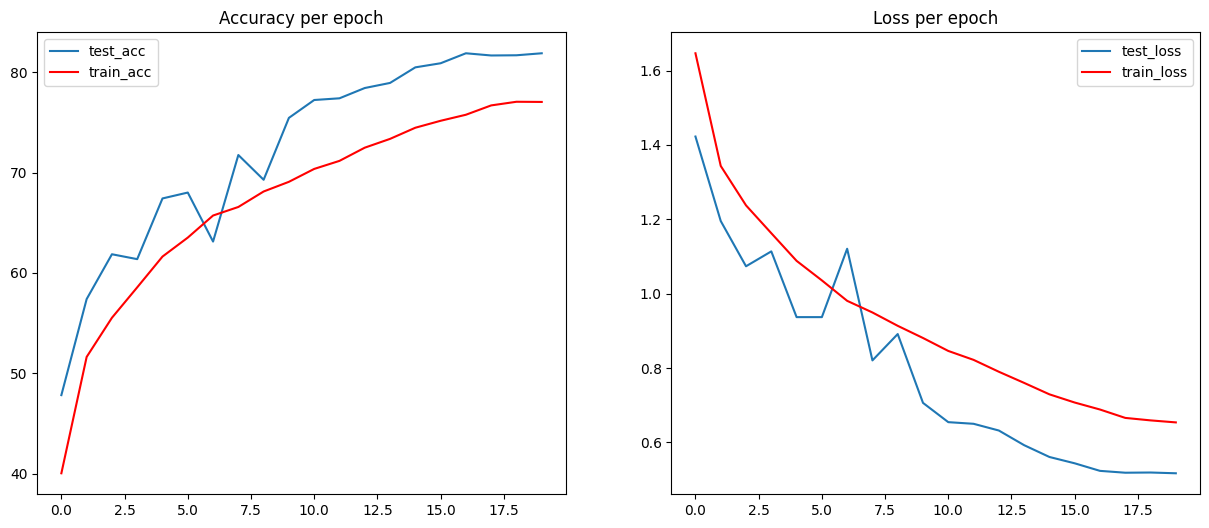

In [19]:
training_curves()

In [20]:
train_loss_dict["BN"] = train_loss_log
test_loss_dict["BN"] = test_loss_log

train_accuracy_dict["BN"] = train_accuracy_log
test_accuracy_dict["BN"] = test_accuracy_log

###GN

In [21]:
test_accuracy_log = []
train_accuracy_log = []

test_loss_log = []
train_loss_log = []

import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR, OneCycleLR

l1_factor = 0
l2_factor = 0.0001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_gn.parameters(), lr = 1e-3) #, weight_decay=l2_factor

epochs = 20

# scheduler2 =ReduceLROnPlateau(optimizer=optimizer, verbose=True)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=782, epochs=epochs)   # steps_per_epoch = len(train_loader)


EPOCHS = epochs

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_valid_loss = float('inf')


for epoch in range(EPOCHS):

    train_loss, train_acc = train(net_gn, train_loader, optimizer, scheduler, criterion, l1_factor, device)
    valid_loss, valid_acc = evaluate(net_gn, test_loader, criterion, device)

    test_accuracy_log.append(valid_acc*100)
    train_accuracy_log.append(train_acc*100)

    test_loss_log.append(valid_loss)
    train_loss_log.append(train_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(net_gn.state_dict(), '96K-model.pth')

    print(f'Epoch: {epoch+1:02} ')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 
	Train Loss: 1.831 | Train Acc: 33.36%
	 Val. Loss: 1.530 |  Val. Acc: 42.87%
Epoch: 02 
	Train Loss: 1.546 | Train Acc: 43.47%
	 Val. Loss: 1.580 |  Val. Acc: 43.74%
Epoch: 03 
	Train Loss: 1.428 | Train Acc: 48.19%
	 Val. Loss: 1.296 |  Val. Acc: 52.56%
Epoch: 04 
	Train Loss: 1.315 | Train Acc: 52.69%
	 Val. Loss: 1.125 |  Val. Acc: 59.61%
Epoch: 05 
	Train Loss: 1.229 | Train Acc: 56.05%
	 Val. Loss: 1.059 |  Val. Acc: 63.13%
Epoch: 06 
	Train Loss: 1.156 | Train Acc: 58.90%
	 Val. Loss: 0.937 |  Val. Acc: 67.02%
Epoch: 07 
	Train Loss: 1.093 | Train Acc: 61.36%
	 Val. Loss: 0.858 |  Val. Acc: 70.03%
Epoch: 08 
	Train Loss: 1.034 | Train Acc: 63.60%
	 Val. Loss: 0.888 |  Val. Acc: 69.38%
Epoch: 09 
	Train Loss: 0.992 | Train Acc: 65.33%
	 Val. Loss: 0.855 |  Val. Acc: 69.71%
Epoch: 10 
	Train Loss: 0.963 | Train Acc: 66.33%
	 Val. Loss: 0.808 |  Val. Acc: 72.35%
Epoch: 11 
	Train Loss: 0.926 | Train Acc: 67.38%
	 Val. Loss: 0.723 |  Val. Acc: 75.18%
Epoch: 12 
	Train Los

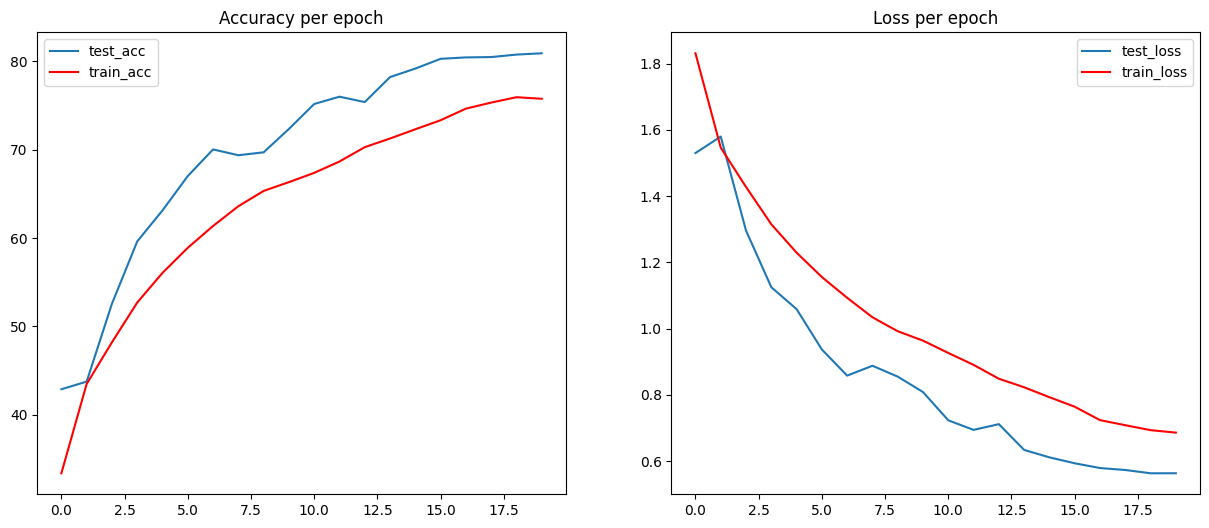

In [22]:
training_curves()

In [23]:
train_loss_dict["GN"] = train_loss_log
test_loss_dict["GN"] = test_loss_log

train_accuracy_dict["GN"] = train_accuracy_log
test_accuracy_dict["GN"] = test_accuracy_log

###LN

In [24]:
test_accuracy_log = []
train_accuracy_log = []

test_loss_log = []
train_loss_log = []

import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR, OneCycleLR

l1_factor = 0
l2_factor = 0.0001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_ln.parameters(), lr = 1e-3) #, weight_decay=l2_factor

epochs = 20

# scheduler2 =ReduceLROnPlateau(optimizer=optimizer, verbose=True)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=782, epochs=epochs)   # steps_per_epoch = len(train_loader)


EPOCHS = epochs

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_valid_loss = float('inf')


for epoch in range(EPOCHS):

    train_loss, train_acc = train(net_ln, train_loader, optimizer, scheduler, criterion, l1_factor, device)
    valid_loss, valid_acc = evaluate(net_ln, test_loader, criterion, device)

    test_accuracy_log.append(valid_acc*100)
    train_accuracy_log.append(train_acc*100)

    test_loss_log.append(valid_loss)
    train_loss_log.append(train_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(net_ln.state_dict(), '96K-model.pth')

    print(f'Epoch: {epoch+1:02} ')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 
	Train Loss: 1.805 | Train Acc: 32.69%
	 Val. Loss: 1.419 |  Val. Acc: 47.03%
Epoch: 02 
	Train Loss: 1.473 | Train Acc: 46.36%
	 Val. Loss: 1.180 |  Val. Acc: 57.44%
Epoch: 03 
	Train Loss: 1.343 | Train Acc: 51.79%
	 Val. Loss: 1.077 |  Val. Acc: 62.10%
Epoch: 04 
	Train Loss: 1.266 | Train Acc: 55.02%
	 Val. Loss: 1.075 |  Val. Acc: 61.18%
Epoch: 05 
	Train Loss: 1.195 | Train Acc: 58.06%
	 Val. Loss: 0.997 |  Val. Acc: 65.30%
Epoch: 06 
	Train Loss: 1.139 | Train Acc: 59.99%
	 Val. Loss: 0.954 |  Val. Acc: 65.97%
Epoch: 07 
	Train Loss: 1.092 | Train Acc: 61.93%
	 Val. Loss: 0.911 |  Val. Acc: 67.77%
Epoch: 08 
	Train Loss: 1.050 | Train Acc: 63.23%
	 Val. Loss: 0.918 |  Val. Acc: 68.28%
Epoch: 09 
	Train Loss: 1.003 | Train Acc: 64.74%
	 Val. Loss: 0.851 |  Val. Acc: 70.58%
Epoch: 10 
	Train Loss: 0.969 | Train Acc: 66.16%
	 Val. Loss: 0.819 |  Val. Acc: 71.55%
Epoch: 11 
	Train Loss: 0.929 | Train Acc: 67.52%
	 Val. Loss: 0.759 |  Val. Acc: 73.41%
Epoch: 12 
	Train Los

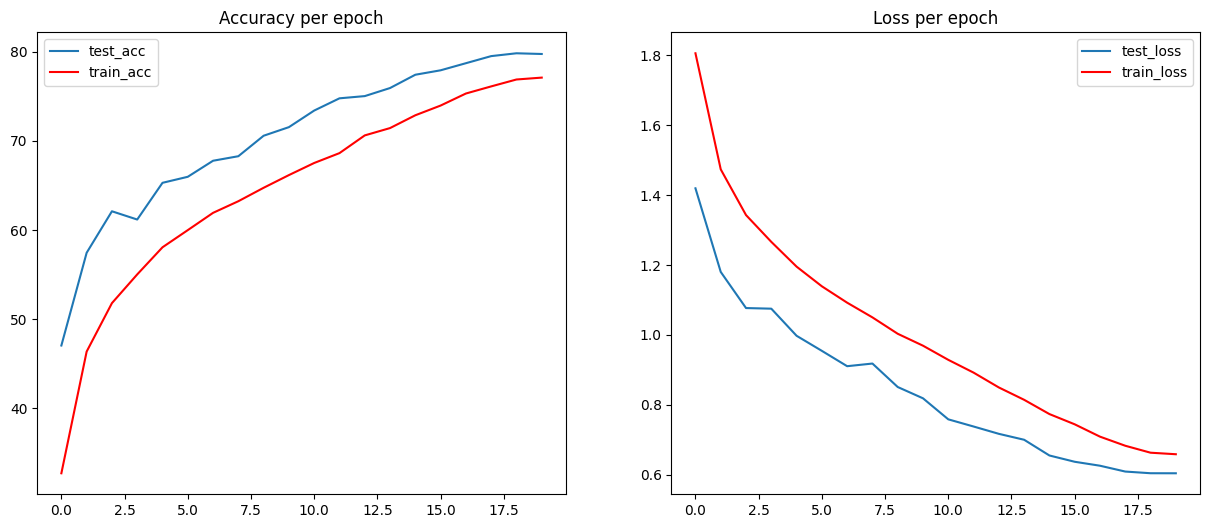

In [25]:
training_curves()

In [26]:
train_loss_dict["LN"] = train_loss_log
test_loss_dict["LN"] = test_loss_log

train_accuracy_dict["LN"] = train_accuracy_log
test_accuracy_dict["LN"] = test_accuracy_log

Text(0.5, 1.0, 'TEST ACCURACY')

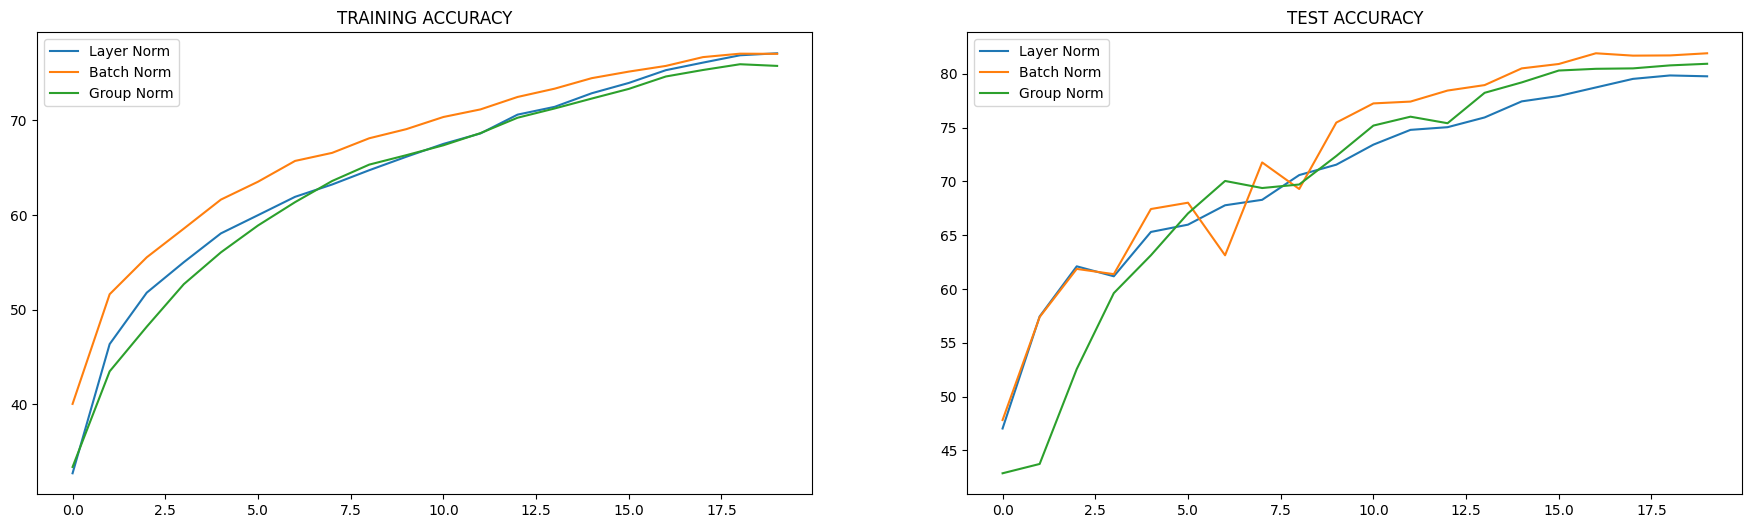

In [28]:
plt.rcParams['figure.figsize'] = [22, 6]

plt.subplot(1,2,1)
plt.plot(train_accuracy_dict["LN"])
plt.plot(train_accuracy_dict["BN"])
plt.plot(train_accuracy_dict["GN"])
plt.legend(["Layer Norm", "Batch Norm", "Group Norm"])
plt.title("TRAINING ACCURACY")

plt.subplot(1,2,2)
plt.plot(test_accuracy_dict["LN"])
plt.plot(test_accuracy_dict["BN"])
plt.plot(test_accuracy_dict["GN"])
plt.legend(["Layer Norm", "Batch Norm", "Group Norm"])
plt.title("TEST ACCURACY")

Text(0.5, 1.0, 'TEST LOSS')

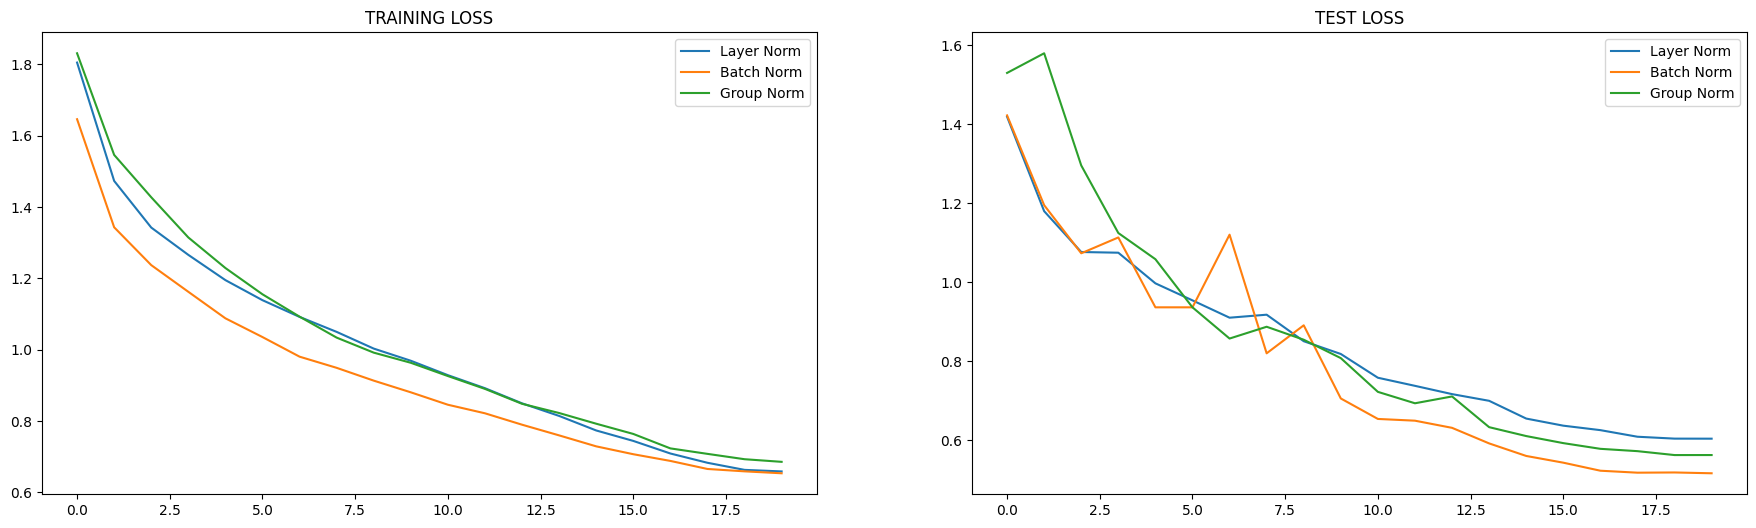

In [29]:
plt.rcParams['figure.figsize'] = [22, 6]

plt.subplot(1,2,1)
plt.plot(train_loss_dict["LN"])
plt.plot(train_loss_dict["BN"])
plt.plot(train_loss_dict["GN"])
plt.legend(["Layer Norm", "Batch Norm", "Group Norm"])
plt.title("TRAINING LOSS")

plt.subplot(1,2,2)
plt.plot(test_loss_dict["LN"])
plt.plot(test_loss_dict["BN"])
plt.plot(test_loss_dict["GN"])
plt.legend(["Layer Norm", "Batch Norm", "Group Norm"])
plt.title("TEST LOSS")

## Check Misclassified Images

In [30]:
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    # img[0] = img[0]*0.1307 + 0.3081
    #img[1] = img[1]*0.24348513 + 0.48215841
    #img[2] = img[2]*0.26158784 + 0.44653091
    img = img
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def imshow(img):
    img = img*0.4466 +  0.2470     # unnormalize
    # img[0] = img[0]*0.1307 + 0.3081
    #img[1] = img[1]*0.24348513 + 0.48215841
    #img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    image = np.transpose(npimg, (1, 2, 0))
    plt.imshow(image)  # removed reshape here
    plt.grid(False)
    return image


### Batch Norm Model Misclassified Images

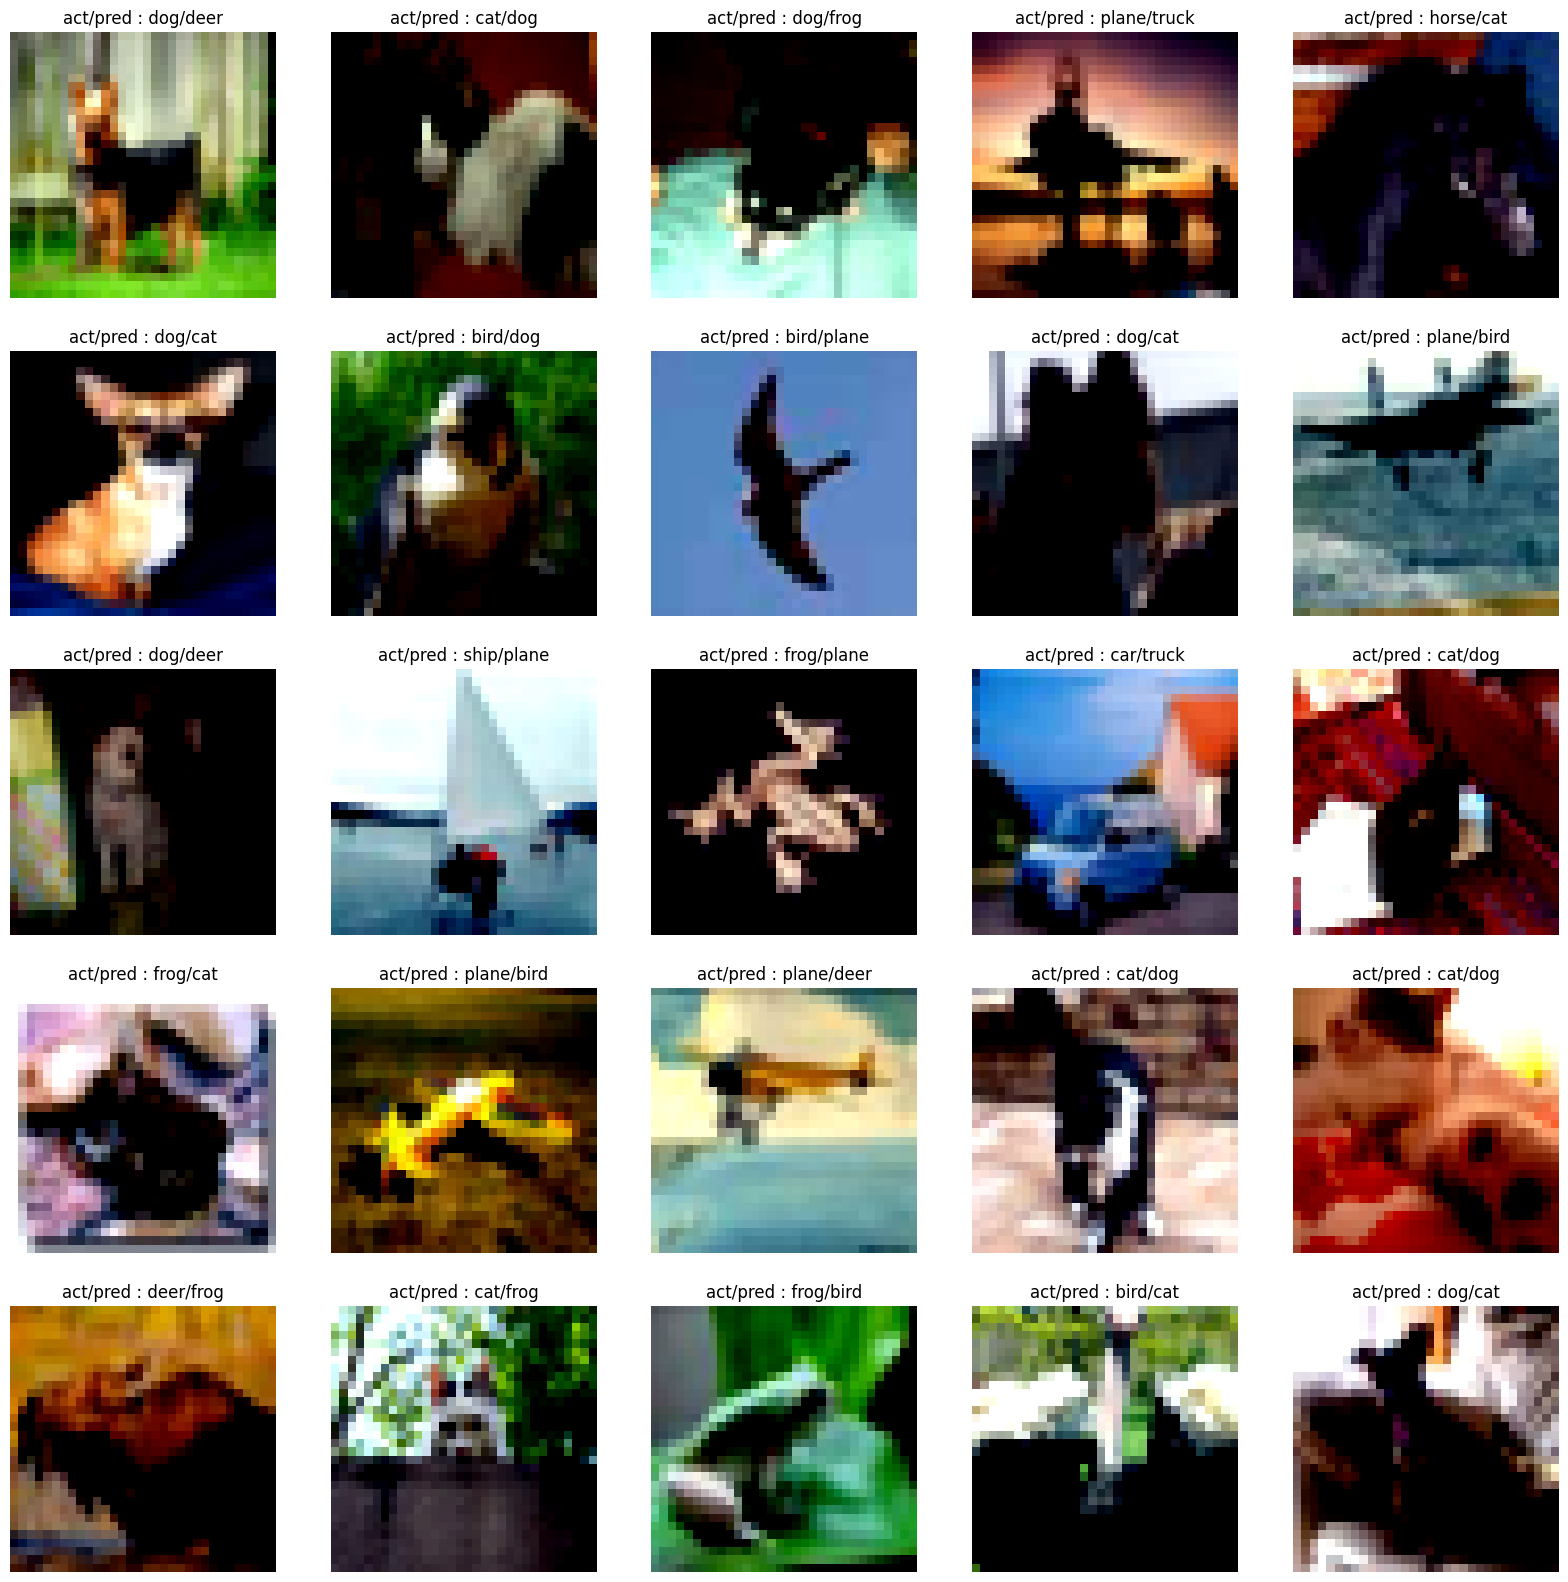

In [31]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

net_bn.eval()

figure = plt.figure(figsize=(20, 20))
num_of_images = 25
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(
            device), target.to(device)
        output = net_bn(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(5, 5, index)
                plt.axis('off')
                titl = 'act/pred : ' + \
                    str(classes[target[idx[0]].cpu().item(
                    )]) + '/' + str(classes[pred[idx[0]].cpu().item()])
                # prints the 1st index of each batch.

                img = data[idx[0]].cpu()
                untrans_img.append(img)
                image = imshow(img)
                misclass_img_list.append(image)



                plt.title(titl)
                index += 1

### Group Norm Model Misclassified Images

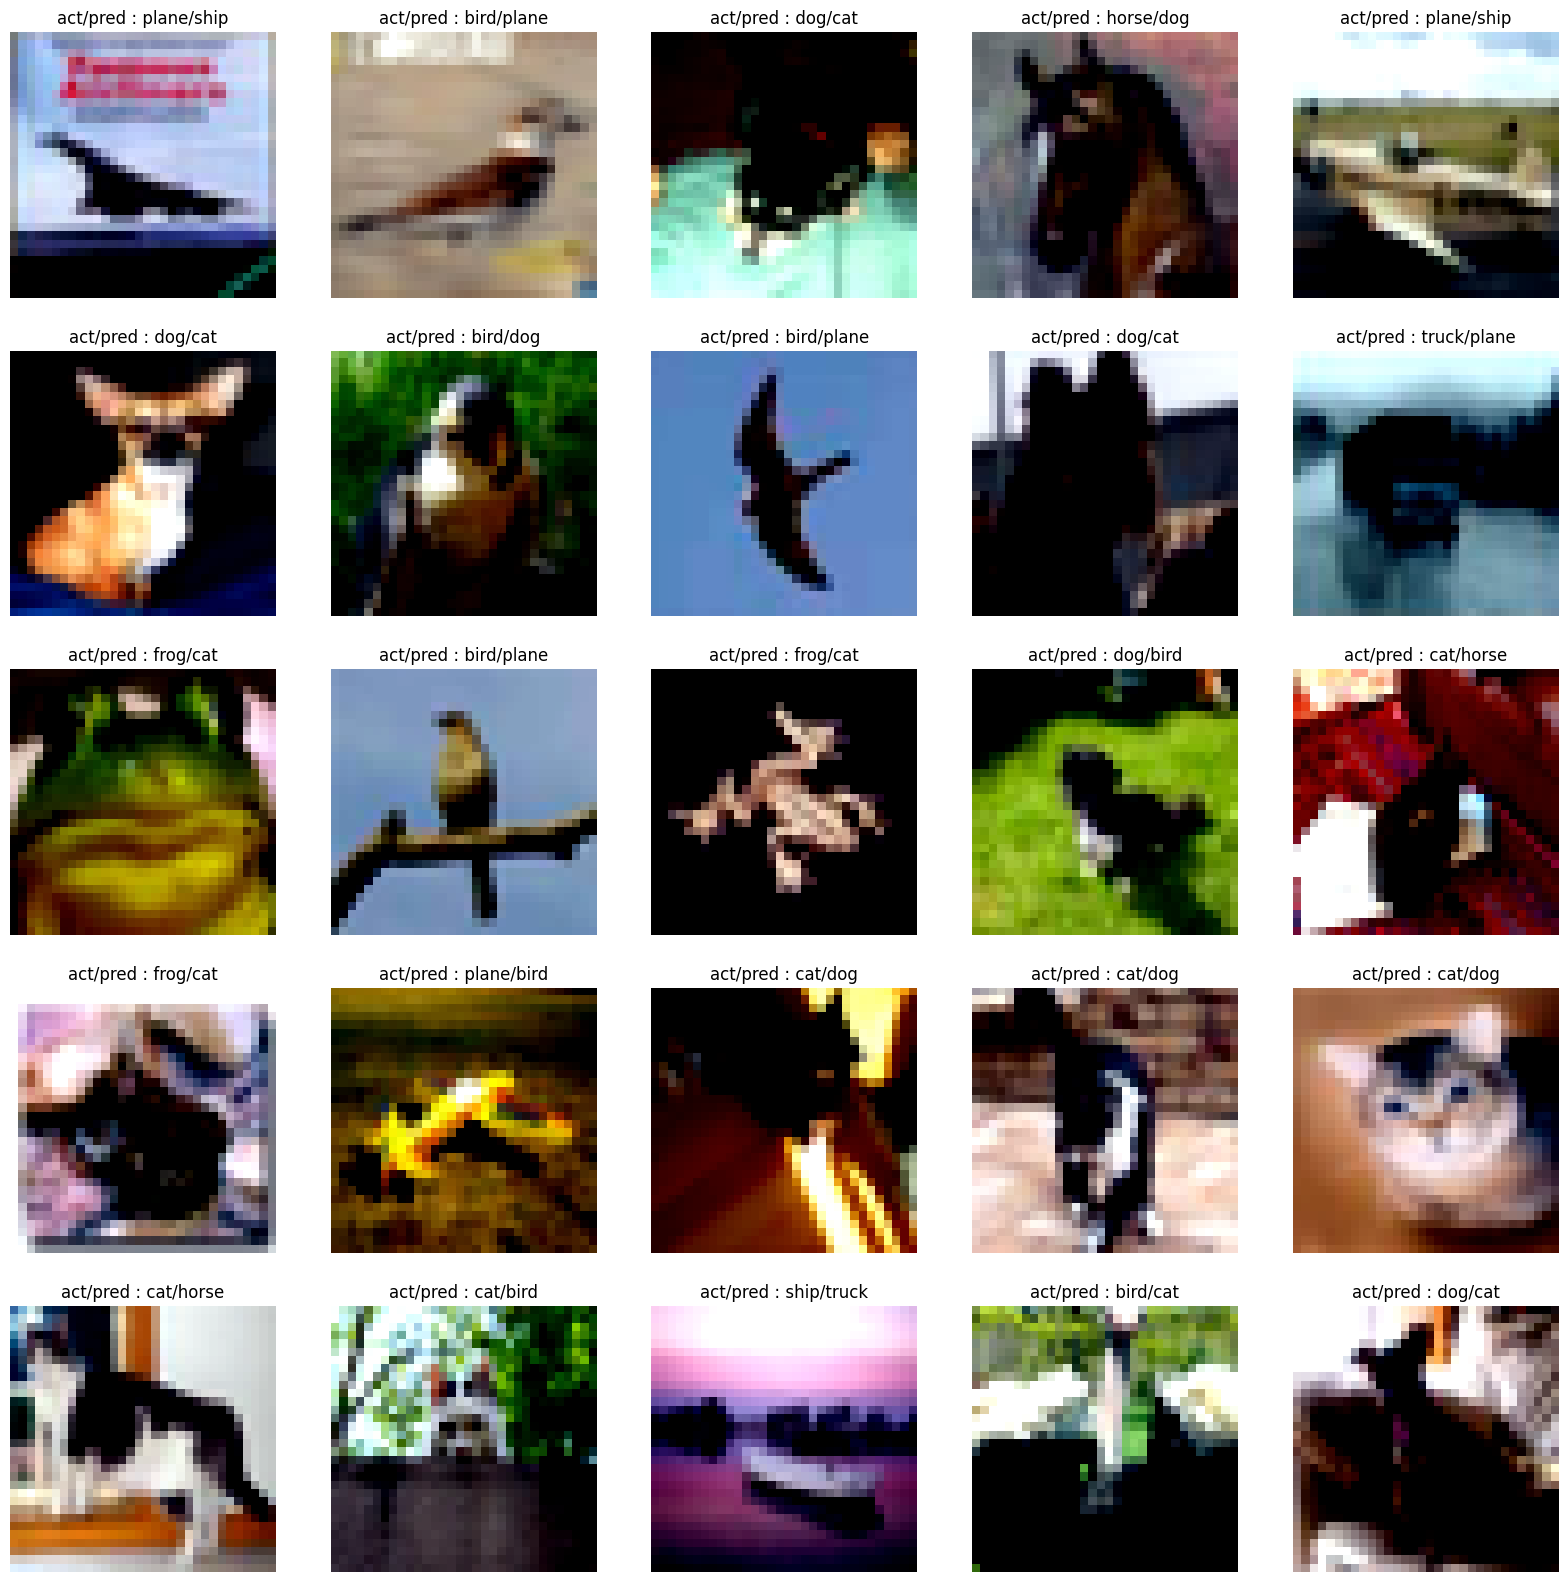

In [32]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

net_gn.eval()

figure = plt.figure(figsize=(20, 20))
num_of_images = 25
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(
            device), target.to(device)
        output = net_gn(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(5, 5, index)
                plt.axis('off')
                titl = 'act/pred : ' + \
                    str(classes[target[idx[0]].cpu().item(
                    )]) + '/' + str(classes[pred[idx[0]].cpu().item()])
                # prints the 1st index of each batch.

                img = data[idx[0]].cpu()
                untrans_img.append(img)
                image = imshow(img)
                misclass_img_list.append(image)



                plt.title(titl)
                index += 1

### Layer Norm Model Misclassified Images

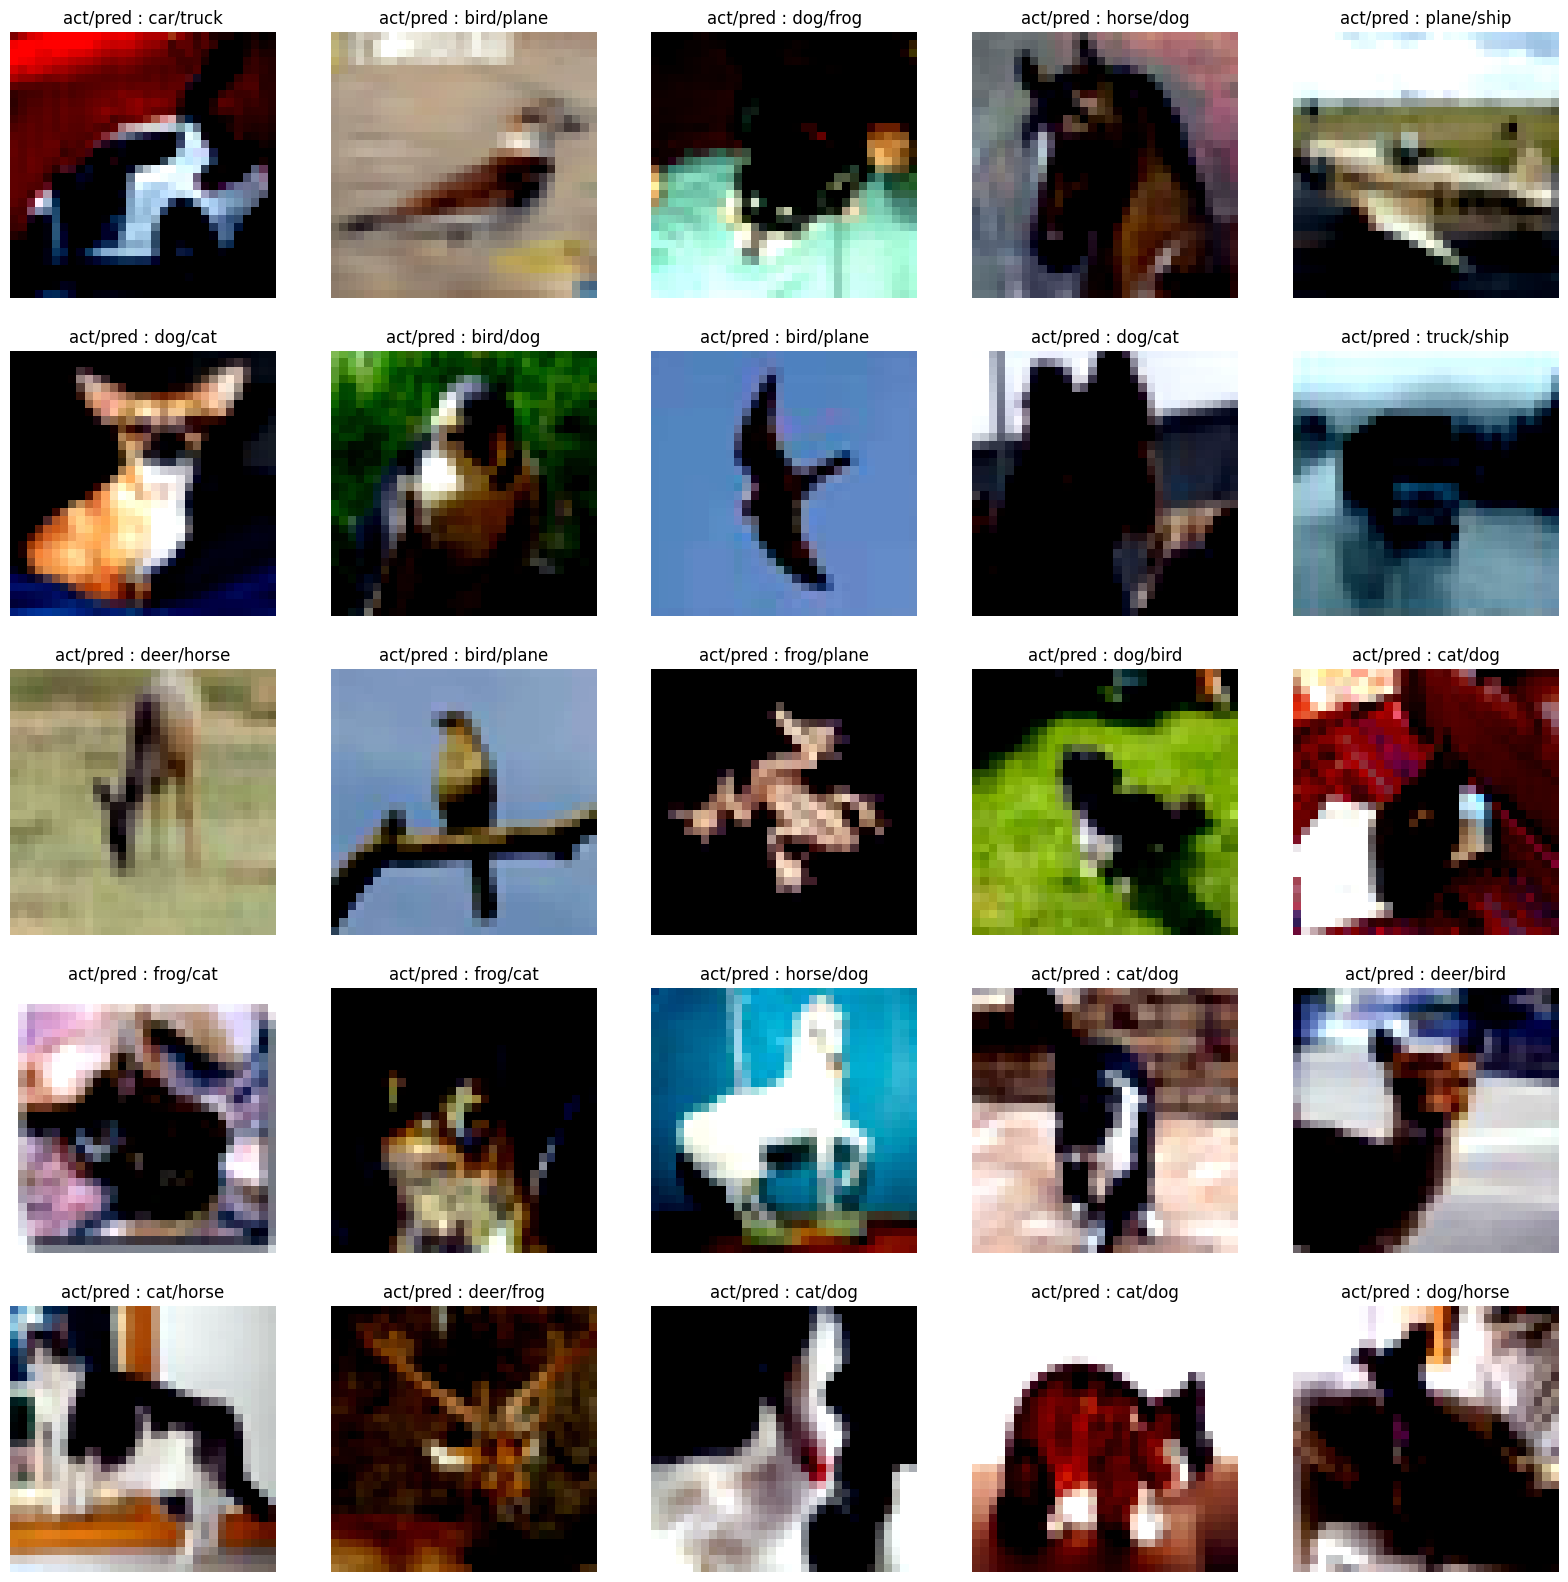

In [33]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

net_ln.eval()

figure = plt.figure(figsize=(20, 20))
num_of_images = 25
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(
            device), target.to(device)
        output = net_ln(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(5, 5, index)
                plt.axis('off')
                titl = 'act/pred : ' + \
                    str(classes[target[idx[0]].cpu().item(
                    )]) + '/' + str(classes[pred[idx[0]].cpu().item()])
                # prints the 1st index of each batch.

                img = data[idx[0]].cpu()
                untrans_img.append(img)
                image = imshow(img)
                misclass_img_list.append(image)



                plt.title(titl)
                index += 1